In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Paso 2.

In [6]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')

In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [10]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Convertimos a Int64 para manter valores ausentes si los hay y volver numero, ya que si lo cambiamos a 0 por ejemplo podría afectar una agrupación si llegaramos a hacerla o en el caso de 'critic_score 0 user_score puede afectar el calculo estadistico' para el caso de estas columnas puede ser que no se les hiciera una calificación.
Para el caso de TBD, también lo trataremos como NaN ya que al hacer algun analisis dependiendo del que sea, no lo realizaremos tenendiendo en cuenta esas filas.

In [11]:
games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


LANZAMIENTO DE JUEGOS POR AÑOS

In [12]:
games_x_years = games.groupby('year_of_release')['name'].count()

In [13]:
print(games_x_years)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


In [14]:
import matplotlib.pyplot as plt

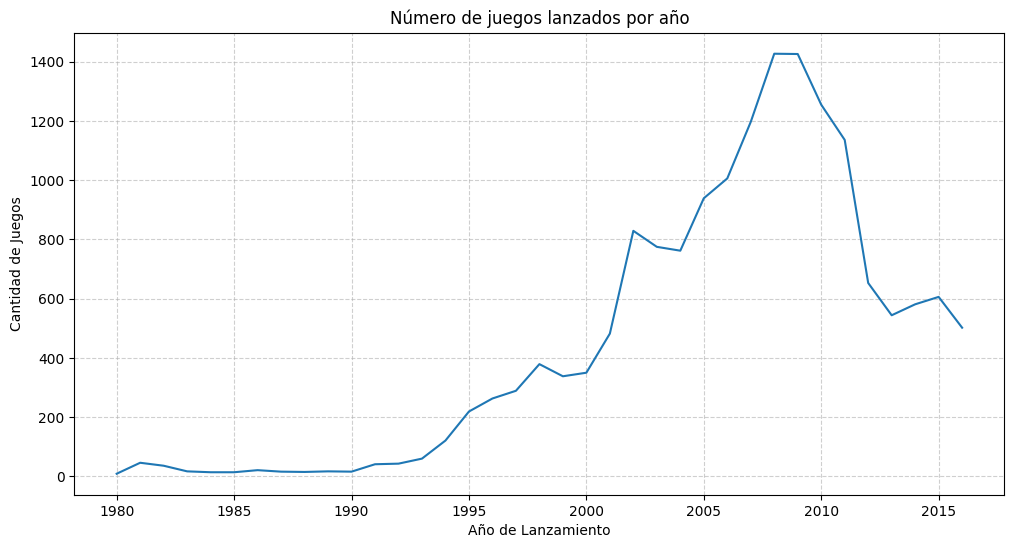

In [15]:
plt.figure(figsize=(12,6))
plt.plot(games_x_years.index, games_x_years.values)
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Desde 1980 hasta aprox 1995 la cantidad de juegos es minima por lo que no sería significativo una analisis sobre estos juegos.

Ventas por plataforma

In [16]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.head(10)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Ventas por Plataforma

In [17]:
platform_x_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_x_sales.head(10)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

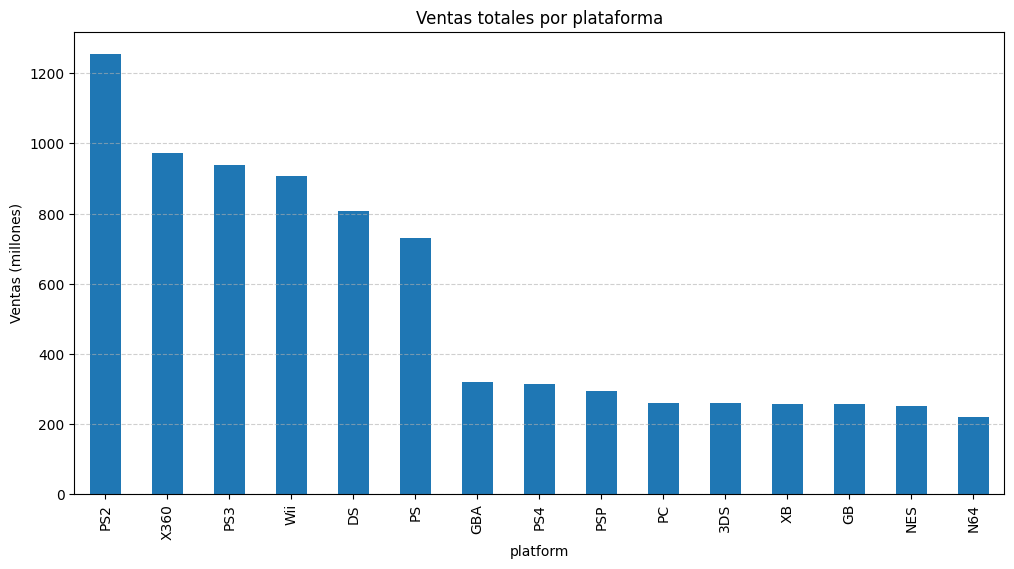

In [18]:
plt.figure(figsize=(12,6))
platform_x_sales.head(15).plot(kind='bar')
plt.title('Ventas totales por plataforma')
plt.ylabel('Ventas (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Las plataformas de mayor venta son las 6 primeras: PS2, X360, PS3, Wii, DS y P5

In [19]:
top_platforms = platform_x_sales.head(6).index
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [20]:
import seaborn as sns

<AxesSubplot:title={'center':'Ventas por año para plataformas principales'}, xlabel='year_of_release'>

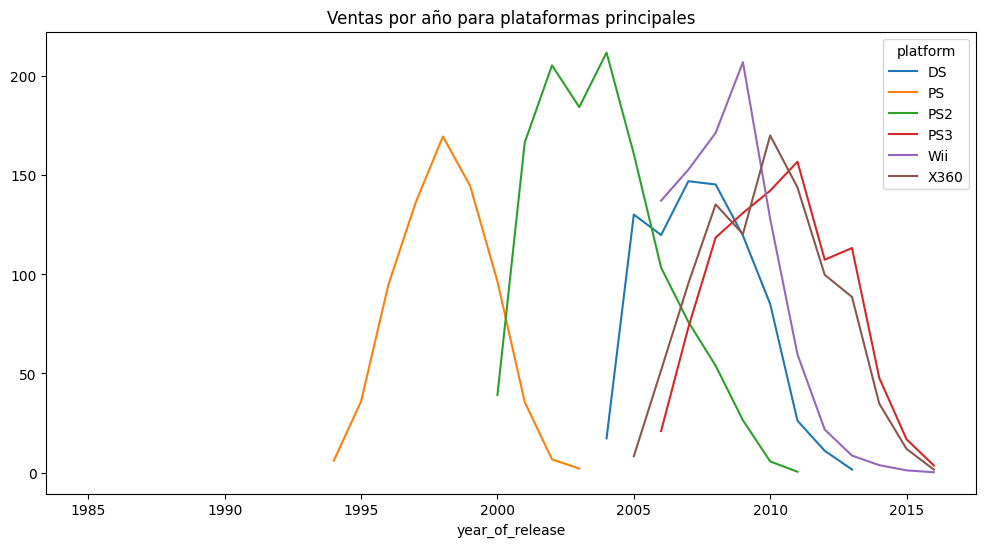

In [21]:
games[games['platform'].isin(top_platforms)] \
    .groupby(['platform', 'year_of_release'])['total_sales'] \
    .sum() \
    .unstack(0) \
    .plot(figsize=(12,6), title='Ventas por año para plataformas principales')

In [22]:
top_platform = platform_x_sales.head(6).index
print(top_platform)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


In [23]:
platform_year_sales = (games[games['platform'].isin(top_platform)].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index())

platform_year_sales.head()

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17


DS fue la plataforma que mas tiempo duro con ventas, ya que a pesar de ser pocas sus ventas en sus incicios, tuvo ventas durante casi 27 años, aunque su mayor valor en ventas fue entre el 2005 y 2010.
La mayoria de las plataformas tuvieron sus mayores ventas durante aprox 5 años, cuando se lanzaba una nueva plataforma.

Agrupar por juegos filtrado por año:

In [24]:
relevant_games = games[games['year_of_release']>= 2012]
print(f"Juegos desde 2012: {len(relevant_games)}")
print(f"Años únicos: {sorted(relevant_games['year_of_release'].dropna().unique())}")

Juegos desde 2012: 2886
Años únicos: [2012, 2013, 2014, 2015, 2016]


In [25]:
platform_recent_sales = (relevant_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform_recent_sales.head(10)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64

In [26]:
games_after_2012 = games[games['year_of_release'] > 2012]
games_after_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [27]:
games_after_2012['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

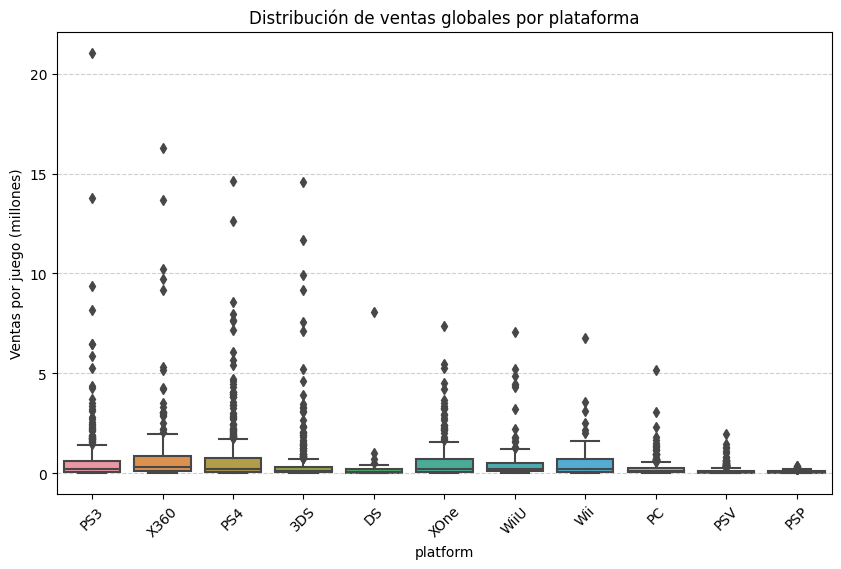

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=relevant_games, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.ylabel('Ventas por juego (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

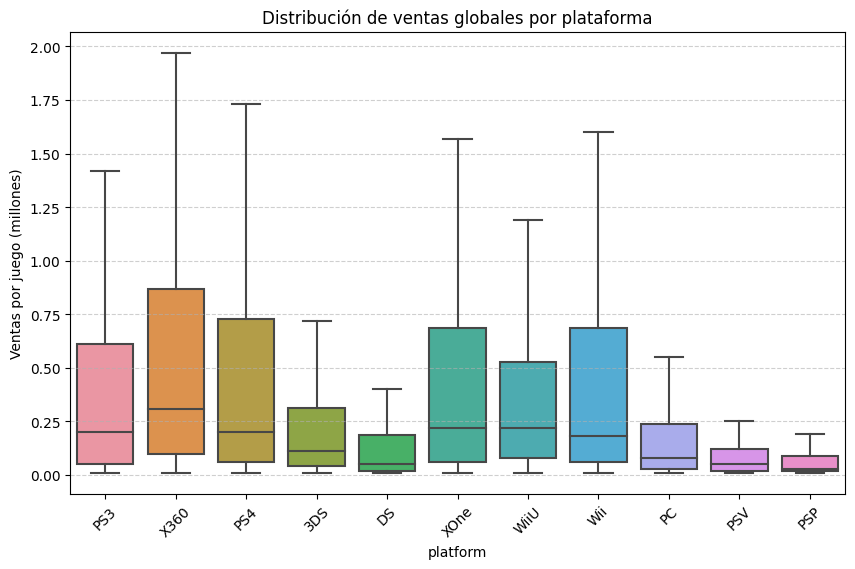

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=relevant_games, x='platform', y='total_sales', showfliers = False)
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.ylabel('Ventas por juego (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Se evidencia que hay valores extremos, podrían ser lanzamientos muy exitosos. 3DS, Wii

In [30]:
last_sales_year = games.groupby('platform')['year_of_release'].max().sort_values()
last_sales_year

platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
DS      2013
PSP     2015
PS3     2016
PS4     2016
PSV     2016
3DS     2016
Wii     2016
WiiU    2016
X360    2016
PC      2016
XOne    2016
Name: year_of_release, dtype: Int64

In [31]:
posible_modelo = games[games['year_of_release'] >= 2012]
recent_data = games[games['year_of_release'] >= 2012]
recent_sales = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
recent_sales

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Teniendo en cuenta esta información, podriamos pensar que las plataformas potenciales para el 2017 serían PS4, Xone y 3DS

Diagrama para las ventas globales

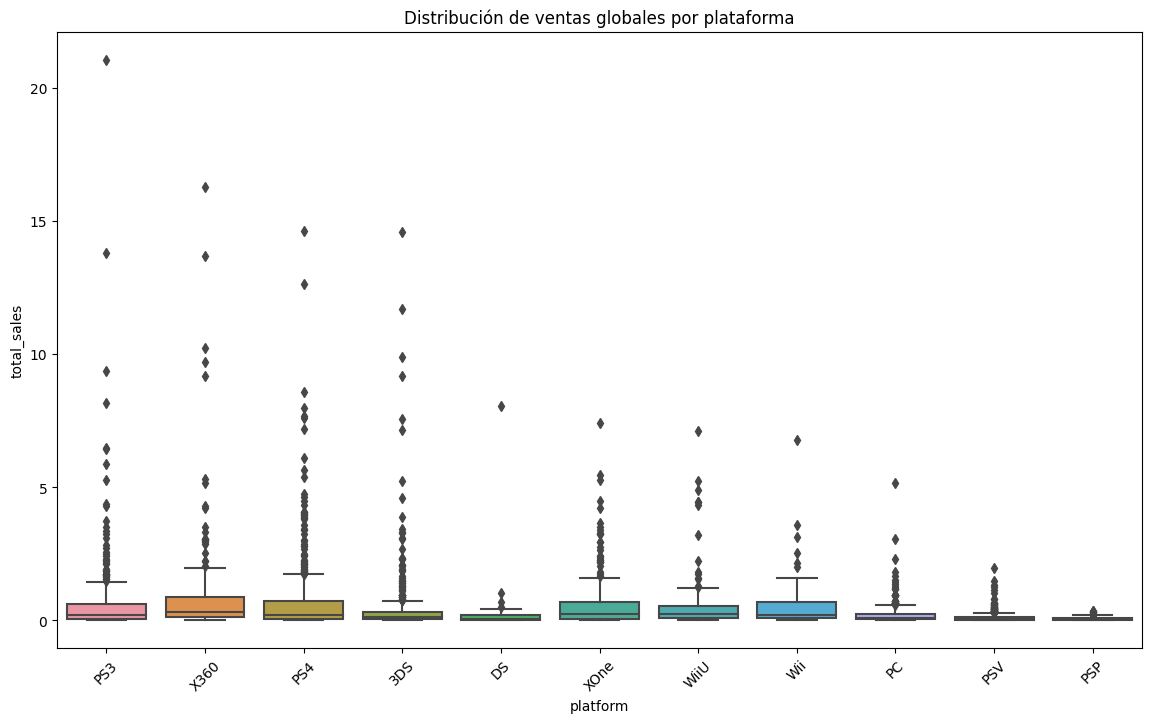

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.boxplot(data=posible_modelo, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.show()

Las diferencias en las medianas de cada plataforma son significativas, y el rango de las mismas es muy amplio, en especial en PS3, lo que muestra que es la plataforma donde uno o varios de sus juegos han sido los mas vendidos. También se evidencia que al tener esa variabilidad, lo que mayormente marca la diferencia en la venta es el juego mas que la misma plataforma.

Utilizaré la plataforma PS4, la cual para el modelo del 2017 será una de las potenciales

In [33]:
platform = "PS4"
df_plat = games[games['platform'] == platform].copy()

voy a eliminar las filas sin valores para este calculo

In [34]:
df_plat = df_plat.dropna(subset=['user_score', 'critic_score', 'total_sales'])


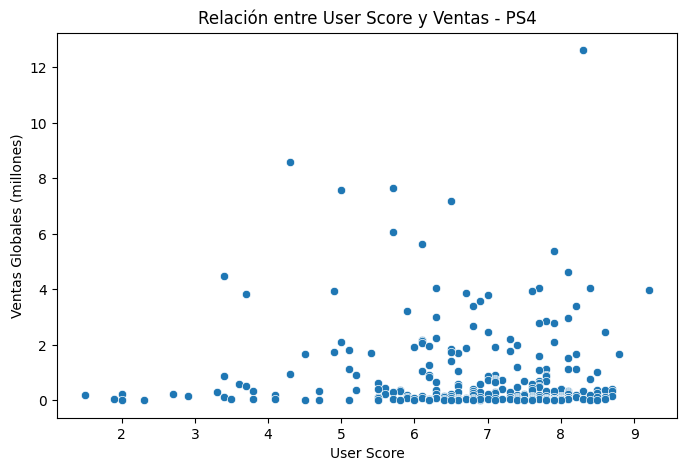

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='user_score', y='total_sales', data=df_plat)
plt.title(f'Relación entre User Score y Ventas - {platform}')
plt.xlabel('User Score')
plt.ylabel('Ventas Globales (millones)')
plt.show()

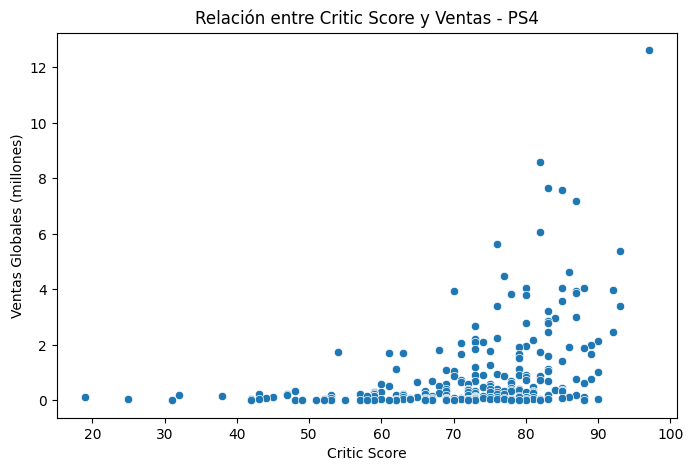

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='critic_score', y='total_sales', data=df_plat)
plt.title(f'Relación entre Critic Score y Ventas - {platform}')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales (millones)')
plt.show()

In [37]:
corr_user = df_plat['user_score'].corr(df_plat['total_sales'])
corr_critic = df_plat['critic_score'].corr(df_plat['total_sales'])

print('correlacion usuarios=', corr_user, 'correlacion criticos=', corr_critic)

correlacion usuarios= -0.03362497596528878 correlacion criticos= 0.40589480145836687


Esto nos podria mostrar que la calificación que le dan los usuarios a los juegos no influye en la compra de los mismos, mientras que la calificación de los criticos si influye en la decisión de compra de los juegos.

In [38]:
platform = "PS4"
plat_games = games[games["platform"] == platform]["name"].unique()
same_games = games[games["name"].isin(plat_games)].copy()
same_games = same_games[['name', 'platform', 'total_sales']]


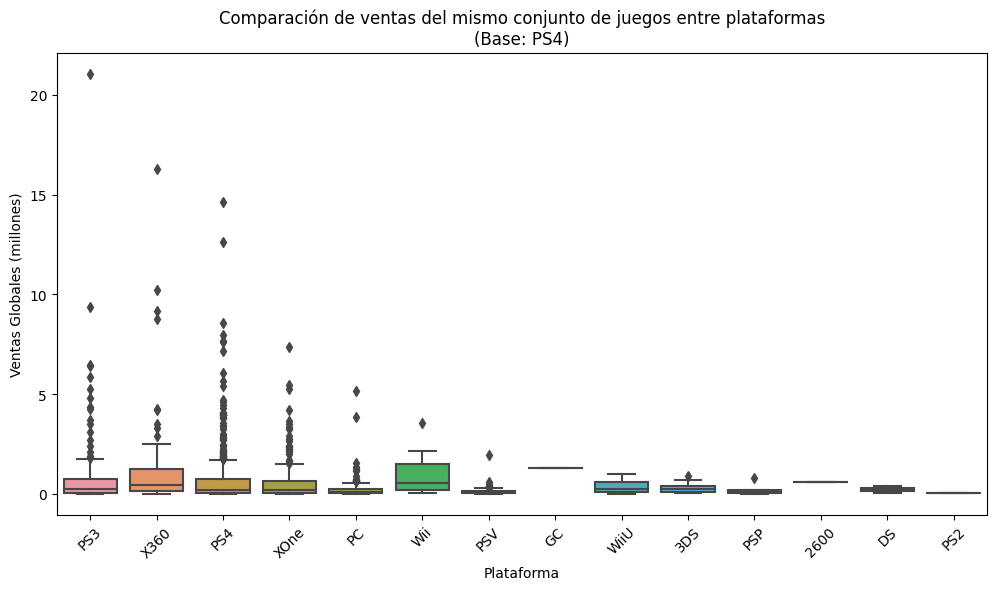

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data=same_games, x='platform', y='total_sales')
plt.title(f'Comparación de ventas del mismo conjunto de juegos entre plataformas\n(Base: {platform})')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

In [40]:
avg_sales = same_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
avg_sales

platform
GC      1.300000
X360    1.129646
Wii     1.020000
PS3     0.850393
PS4     0.801378
2600    0.620000
XOne    0.596129
WiiU    0.342703
PC      0.294746
3DS     0.289474
PSP     0.236000
DS      0.220000
PSV     0.144512
PS2     0.060000
Name: total_sales, dtype: float64

In [41]:
games_pivot = same_games.pivot_table(
    index='name',
    columns='platform',
    values='total_sales'
).fillna(0)

games_pivot.head()

platform,2600,3DS,DS,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,,,
7 Days to Die,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.14,0.0,0.00,0.0,0.00,0.00,0.05
Adventure Time: Finn & Jake Investigations,0.0,0.09,0.0,0.0,0.0,0.0,0.08,0.10,0.0,0.00,0.0,0.05,0.09,0.05
Aegis of Earth: Protonovus Assault,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.03,0.0,0.00,0.00,0.00
Agatha Christie's The ABC Murders,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.02,0.0,0.00,0.0,0.00,0.00,0.01
Akiba's Trip: Undead & Undressed,0.0,0.00,0.0,0.0,0.0,0.0,0.11,0.11,0.0,0.15,0.0,0.00,0.00,0.00


Algunos juegos tienen mayores ventas en una plataforma que otra, lo que nos puede mostrar que en realidad al momento de comprar influye tanto el juego como la plataforma.

In [42]:
genre_total_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_total_sales

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

In [43]:
genre_avg_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_avg_sales

genre
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
Name: total_sales, dtype: float64

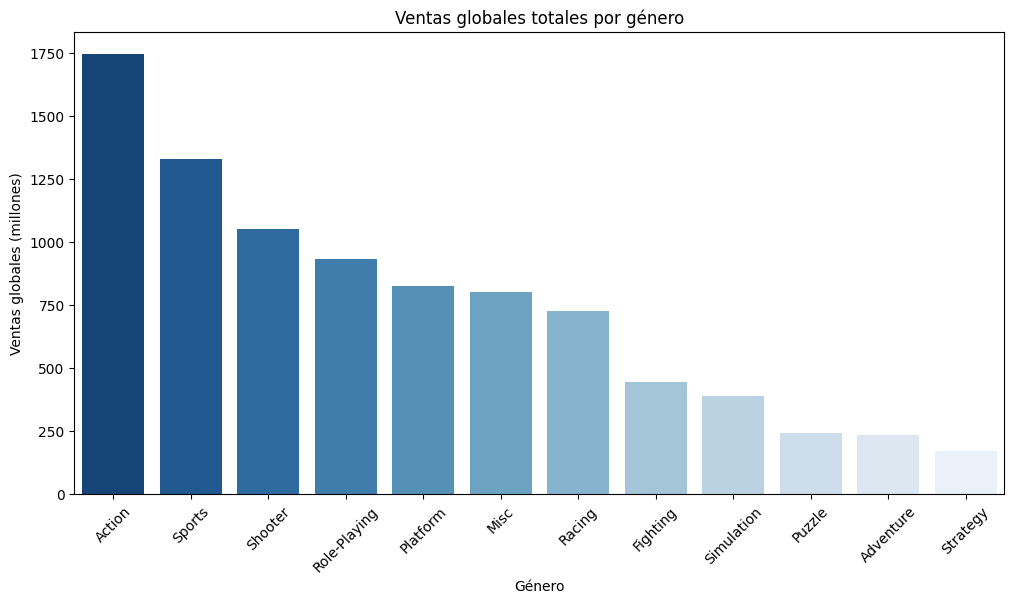

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=genre_total_sales.index,
    y=genre_total_sales.values,
    palette="Blues_r"
)
plt.title("Ventas globales totales por género")
plt.xlabel("Género")
plt.ylabel("Ventas globales (millones)")
plt.xticks(rotation=45)
plt.show()

Los generos mas rentables son Action y Sports y los menos son strategy.

In [45]:
top5_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top5_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print('Top 5 NA', top5_platforms_na)
print()
print('Top 5 UE', top5_platforms_eu)
print()
print('Top 5 JP', top5_platforms_jp)

Top 5 NA platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 UE platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 JP platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


<Figure size 1400x600 with 0 Axes>

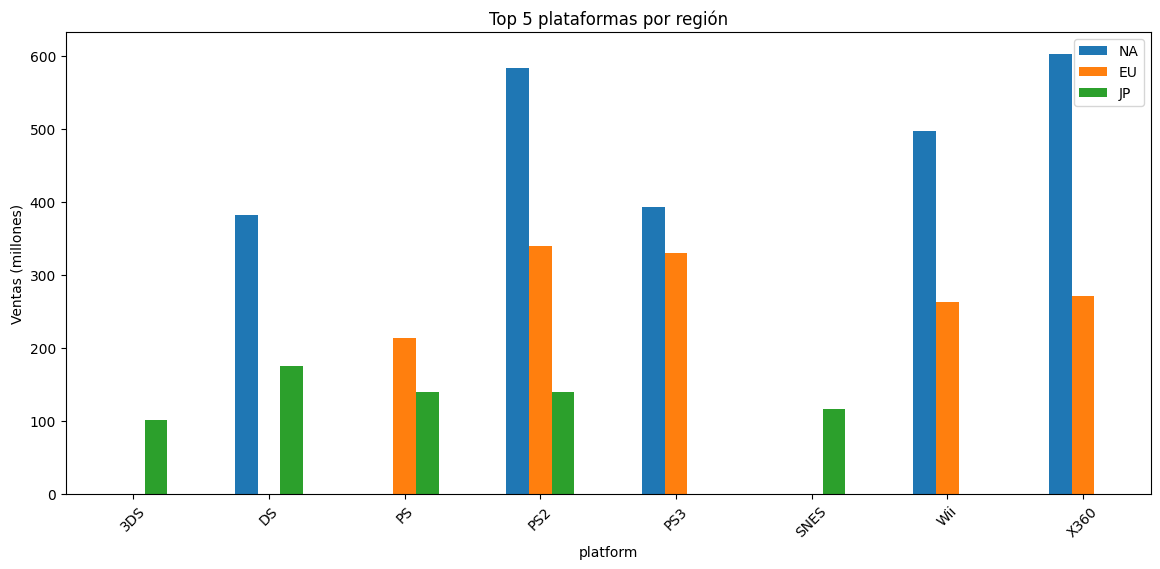

In [46]:
plt.figure(figsize=(14,6))
df_platforms = pd.DataFrame({
    'NA': top5_platforms_na,
    'EU': top5_platforms_eu,
    'JP': top5_platforms_jp
})

df_platforms.plot(kind='bar', figsize=(14,6))
plt.title("Top 5 plataformas por región")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=45)
plt.show()

El PS2 es el unico que se encuentra en el top en las 3 regiones, en NA es donde se encuentra la mayor venta de las plataformas, aunque en las demas regiones hay top de plataformas, en NA es donde mayor ventas se tienen.

In [47]:
top5_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top5_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print('Top 5 genres NA', top5_genres_na)
print()
print('Top 5 genres UE', top5_genres_eu)
print()
print('Top 5 genres JP', top5_genres_jp)


Top 5 genres NA genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 genres UE genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 genres JP genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Tanto en NA como en UE los principales generos son Action, Sports y Shooter.

In [48]:
rating_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating_na, rating_eu, rating_jp

(rating
 E       1292.99
 T        759.75
 M        748.48
 E10+     353.32
 K-A        2.56
 EC         1.53
 AO         1.26
 RP         0.00
 Name: na_sales, dtype: float64,
 rating
 E       710.25
 M       483.97
 T       427.03
 E10+    188.52
 AO        0.61
 K-A       0.27
 EC        0.11
 RP        0.08
 Name: eu_sales, dtype: float64,
 rating
 E       198.11
 T       151.40
 M        64.24
 E10+     40.20
 K-A       1.46
 AO        0.00
 EC        0.00
 RP        0.00
 Name: jp_sales, dtype: float64)

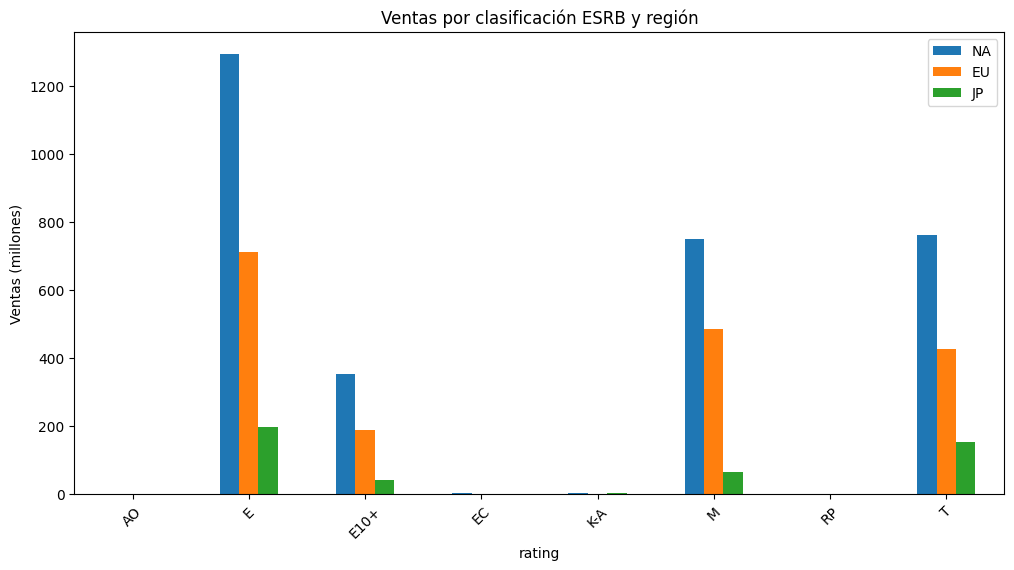

In [49]:
df_rating = pd.DataFrame({
    'NA': rating_na,
    'EU': rating_eu,
    'JP': rating_jp
})

df_rating.plot(kind='bar', figsize=(12,6))
plt.title("Ventas por clasificación ESRB y región")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=45)
plt.show()

PRUEBA HIPOTESIS:

Utilizaré un test bilateral para muestras independientes y equal_val=false ya que son de diferente tamaño.
Prueba 1: La hipotesis nula es que las medias son iguales y la alternativa es que las medias son diferentes.
Prueba 2: La hipotesis nula es que las calificaciones son iguales y la alternativa es que las medias son diferentes.

In [50]:
from scipy import stats

In [51]:
xone = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

t_stat, p_value = stats.ttest_ind(xone, pc, equal_var=False)

t_stat, p_value

alpha = 0.05 
if p_value < alpha:
    print("Rechazamos H0: Las medias NO son iguales.")
else:
    print("No rechazamos H0: No hay evidencia de diferencia.")

Rechazamos H0: Las medias NO son iguales.


In [52]:
action = games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score']

t_stat2, p_value2 = stats.ttest_ind(action, sports, equal_var=False)
t_stat2, p_value2
alpha = 0.05 

if p_value2 < alpha:
    print("Rechazamos H0: Las medias de Action y Sports son diferentes.")
else:
    print("No rechazamos H0: No hay evidencia de diferencia.")

No rechazamos H0: No hay evidencia de diferencia.


Conclusión general: 
Una de las conclusiones es que las plataformas mas rentables son PlayStation y Nintendo.
Se evidencia que las plataformas tienen un ciclo de vida entre 6o7 años aprox y que esto dura dependiendo de lo que salgan nuevas plataformas al mercado.
Los generos mas vendidos son los de accion y deportes.
Las calificaciones de los criticos tienen relevancia en la compra de los usuarios.
Las ventas estan directamente relacionadas al genero, region y calificación de los criticos.